In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# ██╗███╗   ██╗████████╗██████╗  ██████╗ ██████╗ ██╗   ██╗ ██████╗████████╗██╗ ██████╗ ███╗   ██╗ #
# ██║████╗  ██║╚══██╔══╝██╔══██╗██╔═══██╗██╔══██╗██║   ██║██╔════╝╚══██╔══╝██║██╔═══██╗████╗  ██║ #
# ██║██╔██╗ ██║   ██║   ██████╔╝██║   ██║██║  ██║██║   ██║██║        ██║   ██║██║   ██║██╔██╗ ██║ #
# ██║██║╚██╗██║   ██║   ██╔══██╗██║   ██║██║  ██║██║   ██║██║        ██║   ██║██║   ██║██║╚██╗██║ #
# ██║██║ ╚████║   ██║   ██║  ██║╚██████╔╝██████╔╝╚██████╔╝╚██████╗   ██║   ██║╚██████╔╝██║ ╚████║ #
# ╚═╝╚═╝  ╚═══╝   ╚═╝   ╚═╝  ╚═╝ ╚═════╝ ╚═════╝  ╚═════╝  ╚═════╝   ╚═╝   ╚═╝ ╚═════╝ ╚═╝  ╚═══╝ #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #                                                                                
                                                                                 
'''
The aim of this project is to recover an image from a degraded version, usually
a blurred and noisy image.
Image restoration is the operation of taking a corrupt/noisy image and
estimating the clean, original image. Corruption may come in many forms such as
motion blur, noise and camera mis-focus.
The prime objective of restoration is to reconstruct an image, that has been
degraded, based on some prior knowledge regarding the phenomena of degradation
of the images.
The intention of restoration is to make amends for, or abolish, noise or damage
which all degrade quality of a picture. Degradation comes in many forms and, for
example, it may be caused by phoenomena of: tear, blur, noise, missing of camera
focus, dirt, scratches, etc.
Moreover, we need to add that most of pictures' degradation comes especially
from the data acquisition process. The aforementioned degradation may involve:
blurring, information loss due to sampling, quantization effects and several
others sources of noise. The purpose of image restoration is to estimate the
original image from the degraded data.
'''



# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#     ██╗███╗   ███╗██████╗  ██████╗ ██████╗ ████████╗ ██╗ ██████╗ ██████╗ ███╗   ██╗███████╗     #
#     ██║████╗ ████║██╔══██╗██╔═══██╗██╔══██╗╚══██╔══╝██╔╝██╔════╝██╔═══██╗████╗  ██║██╔════╝     #
#     ██║██╔████╔██║██████╔╝██║   ██║██████╔╝   ██║  ██╔╝ ██║     ██║   ██║██╔██╗ ██║█████╗       #
#     ██║██║╚██╔╝██║██╔═══╝ ██║   ██║██╔══██╗   ██║ ██╔╝  ██║     ██║   ██║██║╚██╗██║██╔══╝       #
#     ██║██║ ╚═╝ ██║██║     ╚██████╔╝██║  ██║   ██║██╔╝   ╚██████╗╚██████╔╝██║ ╚████║██║          #
#     ╚═╝╚═╝     ╚═╝╚═╝      ╚═════╝ ╚═╝  ╚═╝   ╚═╝╚═╝     ╚═════╝ ╚═════╝ ╚═╝  ╚═══╝╚═╝          #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

# In this section we import all the required modules like numpy, matplotlib,
# datetime and, most importantly, keras

from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
import numpy as np
import matplotlib.pyplot as plt
import datetime

# ==================================== #
#          Model Confiuration          #
# ==================================== #

# Here we:
# - proceed to configure the model as accepting imgs 28x28x1;
# - define input shape like a tensor

img_width, img_height, img_channels = 28, 28, 1
input_shape = (img_width, img_height, img_channels) #vettore colonna 28,28,1

# Here we:
# - define the size of batch (hyperparameter of gradient descent that controls
#     the number of training samples to work through before the model’s
#     internal parameters are updated); 
# - define number of epochs (hyperparameter of gradient descent that controls
#     the number of complete passes through the training dataset).
batch_size = 128
number_of_epochs = 100
verbosity = 1 #0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch
n = 10 #Number of digits to show


In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#      ██████╗  █████╗ ████████╗ █████╗     ██╗███╗   ███╗██████╗  ██████╗ ██████╗ ████████╗      #
#      ██╔══██╗██╔══██╗╚══██╔══╝██╔══██╗    ██║████╗ ████║██╔══██╗██╔═══██╗██╔══██╗╚══██╔══╝      #
#      ██║  ██║███████║   ██║   ███████║    ██║██╔████╔██║██████╔╝██║   ██║██████╔╝   ██║         #
#      ██║  ██║██╔══██║   ██║   ██╔══██║    ██║██║╚██╔╝██║██╔═══╝ ██║   ██║██╔══██╗   ██║         #
#      ██████╔╝██║  ██║   ██║   ██║  ██║    ██║██║ ╚═╝ ██║██║     ╚██████╔╝██║  ██║   ██║         #
#      ╚═════╝ ╚═╝  ╚═╝   ╚═╝   ╚═╝  ╚═╝    ╚═╝╚═╝     ╚═╝╚═╝      ╚═════╝ ╚═╝  ╚═╝   ╚═╝         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

# Here we download the mnist data using load_data().
# The MNIST database of handwritten digits, available from this page, has a
# training set of 60,000 examples, and a test set of 10,000 examples.

# ==================================== #
#          Load MNIST dataset          #
# ==================================== #
(x_train, _), (x_test, _) = mnist.load_data()

# Definition of valuable values.
x_train_number_of_rows = len(x_train) # it could've been also x_train.shape[0]
x_test_number_of_rows = len(x_test) # it could've been also x_test.shape[0]
x_train_new_shape = (x_train_number_of_rows, img_width, img_height, img_channels)
x_test_new_shape = (x_test_number_of_rows, img_width, img_height, img_channels)

# We've already retrieved the MNIST data, therefore we can proceed to normalize
# the aforementioned data and cast it as float type.
# If the values of the input data are in a much too wide range, this can
# negatively impact how well the network is going to perform. 
# In this case, the input values are the pixels in the image, which have a value
# between 0 to 255. So, in order to normalize the data, we can simply divide the
# image values by 255. To do this, we first need to make the data a float type,
# since they are currently integers. We can do this by using the astype() Numpy
# command
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape data
x_train = x_train.reshape(x_train_new_shape) #(number_of_rows,28,28,1)
x_test = x_test.reshape(x_test_new_shape) #(number_of_rows,28,28,1)


In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#            ███╗   ███╗ ██████╗ ██████╗ ███████╗██╗         ██████╗ ███████╗███████╗             #
#            ████╗ ████║██╔═══██╗██╔══██╗██╔════╝██║         ██╔══██╗██╔════╝██╔════╝             #
#            ██╔████╔██║██║   ██║██║  ██║█████╗  ██║         ██║  ██║█████╗  █████╗               #
#            ██║╚██╔╝██║██║   ██║██║  ██║██╔══╝  ██║         ██║  ██║██╔══╝  ██╔══╝               #
#            ██║ ╚═╝ ██║╚██████╔╝██████╔╝███████╗███████╗    ██████╔╝███████╗██║                  #
#            ╚═╝     ╚═╝ ╚═════╝ ╚═════╝ ╚══════╝╚══════╝    ╚═════╝ ╚══════╝╚═╝                  #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

# This is the section where we define the model. First we need to define the
# layers (encoder and decoder layers).
# We begin by instantiating the input img and its shape with the help of the
# NumPy array attribute .shape. Since our inputs are images, it makes sense to
# use convolutional neural networks (convnets) as encoders and decoders. 
# In practical settings, autoencoders applied to images are always convolutional
# autoencoders --they simply perform much better.

# Let's implement one. The encoder will consist in a stack of Conv2D and
# MaxPooling2D layers (max pooling being used for spatial down-sampling), while
# the decoder will consist in a stack of Conv2D and UpSampling2D layers.
# 'relu' is the most common activation, and padding='same' just means we aren't
# changing the size of the image at all.

# ==================================== #
#          Define the Layers           #
# ==================================== #
# This is our input placeholder.
input_img = Input(shape=input_shape) #28,28,1
input_img_dim = input_img.shape
print('Shape of input representation',input_img_dim)

# Encoder Layers
# Conv1 # NOTE: "same" results in padding the input such that the output has the
#               same length as the original input;
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
# Conv3 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoder_output = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# At this point the representation is (4, 4, 8) i.e. 128-dimensional
encoder_output_dim = encoder_output.shape
print('Shape of encoded representation',encoder_output_dim)

# Decoder Layers
# DeConv1
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(encoder_output)
x = UpSampling2D(size = (2, 2))(x)
# DeConv2
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D(size = (2, 2))(x)
# DeConv3
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu')(x)
x = UpSampling2D(size = (2, 2))(x)
decoder_output = Conv2D(filters = 1, kernel_size = (3, 3), activation='sigmoid', padding='same')(x)

decoder_output_dim = decoder_output.shape
print('Shape of decoded representation',decoder_output_dim)

# ==================================== #
#      Instantiate the Autoencoder     #
# ==================================== #
# This model maps an input to its reconstruction.
autoencoder = Model(input_img, decoder_output, name='Convolutional_Autoencoder')
# We'll configure our model to use a per-pixel binary crossentropy loss, and the
# Adam optimizer
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

# ==================================== #
#       Instantiate the Encoder        #
# ==================================== #
# This model maps an input to its encoded representation
encoder = Model(input_img, encoder_output, name='Encoder')
# We'll configure our model to use a per-pixel binary crossentropy loss, and the
# Adam optimizer
encoder.compile(optimizer='Adam', loss='binary_crossentropy')


Shape of input representation (None, 28, 28, 1)
Shape of encoded representation (None, 4, 4, 8)
Shape of decoded representation (None, 28, 28, 1)


In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#          █████╗ ███████╗    ████████╗██████╗  █████╗ ██╗███╗   ██╗██╗███╗   ██╗ ██████╗         #
#         ██╔══██╗██╔════╝    ╚══██╔══╝██╔══██╗██╔══██╗██║████╗  ██║██║████╗  ██║██╔════╝         #
#         ███████║█████╗         ██║   ██████╔╝███████║██║██╔██╗ ██║██║██╔██╗ ██║██║  ███╗        #
#         ██╔══██║██╔══╝         ██║   ██╔══██╗██╔══██║██║██║╚██╗██║██║██║╚██╗██║██║   ██║        #
#         ██║  ██║███████╗       ██║   ██║  ██║██║  ██║██║██║ ╚████║██║██║ ╚████║╚██████╔╝        #
#         ╚═╝  ╚═╝╚══════╝       ╚═╝   ╚═╝  ╚═╝╚═╝  ╚═╝╚═╝╚═╝  ╚═══╝╚═╝╚═╝  ╚═══╝ ╚═════╝         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

# In this section we'd like to see how our newly developed autoencoder (AE)
# model is composed of, so that we'll be able to evaluate the shape of each and
# every layer and to verify that everything has been built correctly. Such
# information is retrieved by means of the .summary() command, which gives us a
# glimpse of the trainable parameters too.
# Next, and most importantly, we'd also like to train our autoencoder, a step
# that we are able complete by using the command .fit(). But what does this do
# and what does it imply? The fitting process is what enables our autoencoder to
# map a certain input to a specific desired output. For instance, since this is
# the first time that we are training our autoencoder, we'll setup the fitting
# process like the following: we'll fix our clean training set on the input side
# of our net and, at the same time, we'll assign the same clean dataset as the
# desired output. In this way, the AE learns how to associate this kind of input
# to the aforementioned desired output.
# In the next sections, we'll also see how to use and adjust our freshly trained
# autoencoder to achieve a specific goal, that is cleaning particularly noisy
# pictures. We can already anticipate that this will be achieved by training
# again our AE, this time mapping noisy input imgs to their respective clean
# counterparts as outputs.

# NOTE: (If this code will be run inside actually installed IDEs, a better suite
# for data evaluation will be available. In particular, we've made our code
# compatible to such suites, thus being ready to take full advantage of their
# data analysis features, thanks to the inclusion of the tensorboard callback.
# It's backend can easily be accessed by typing, in the command console, the
# following line:
# tensorboard --logdir logs/
# More on logs folder in the next paragraph.)

# ==================================== #
#            Fit Clean Data            #
# ==================================== #

# Here we call our autoencoder summary. As anticipated, this command enables us
# to see how autoencoder has been structured and how many trainable parameters
# are available.
autoencoder.summary()

# Here we:
# - create a log folder, where all of the data needed for the tensorboard
#     callback script will be stored
#     (This is the folder, log_dir_clean, is used specifically for the fitting
#     over the clean training set. Further on, a folder for the fitting over the
#     noisy data will be created too, so that we'll then be able to compare how
#     the AE performs);
# - train our autoencoder on the clean MNIST dataset, represented by x_train,
#     and evaluate its validation error over the test set, represented by x_test.
log_dir_clean = "logs/fit_clean/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback_clean = TensorBoard(log_dir=log_dir_clean, histogram_freq=1)
autoencoder_train = autoencoder.fit(x_train, x_train,
                        epochs=number_of_epochs,
                        batch_size=batch_size,
                        shuffle=True,
                        verbose = verbosity,
                        validation_data=(x_test, x_test),
                        callbacks=[tensorboard_callback_clean])


Model: "Convolutional_Autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4,

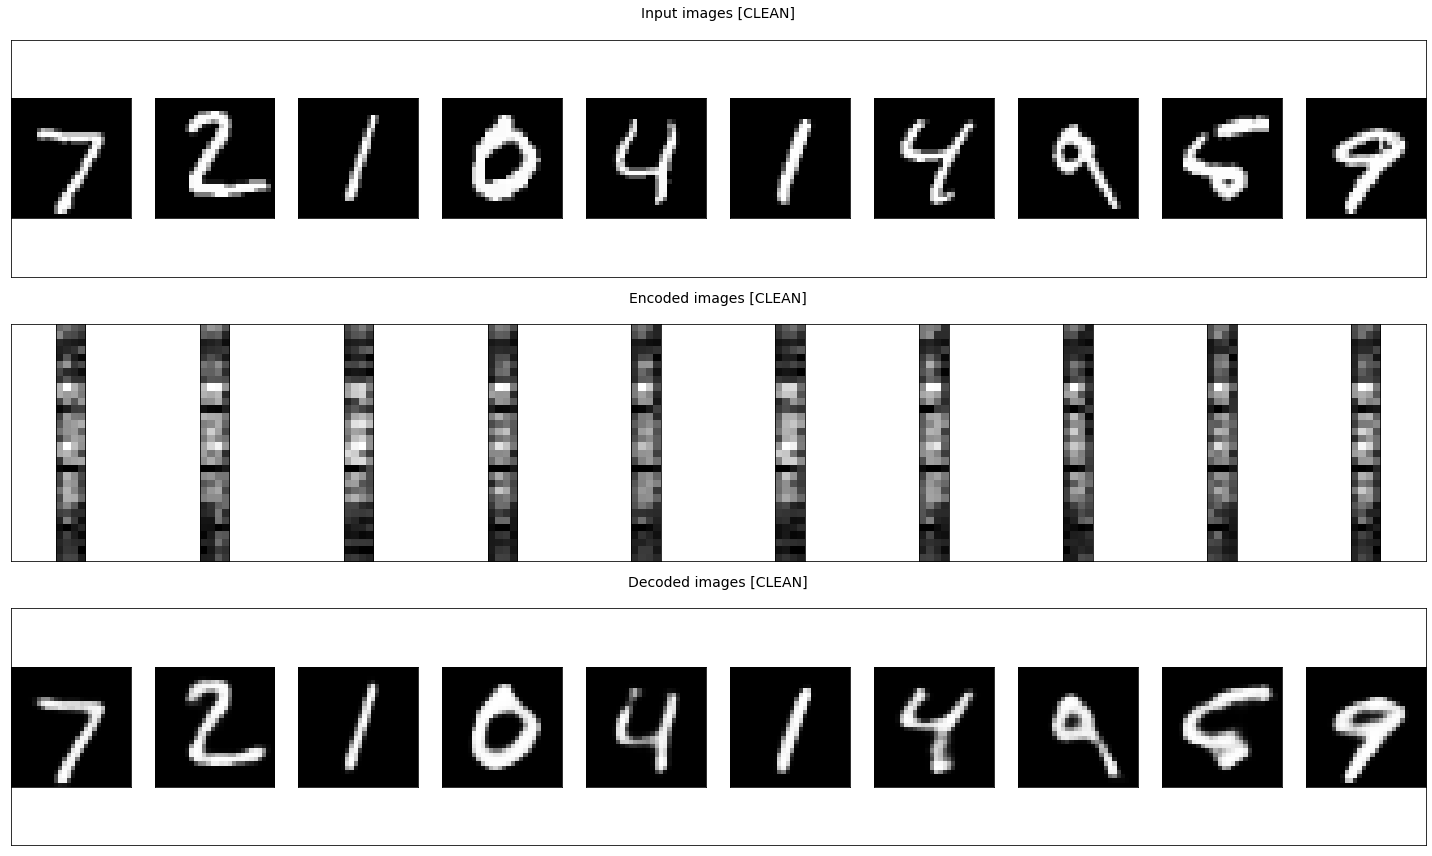

In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#  ██╗   ██╗██╗███████╗██╗   ██╗ █████╗ ██╗            ███╗   ███╗███╗   ██╗██╗███████╗████████╗  #
#  ██║   ██║██║██╔════╝██║   ██║██╔══██╗██║            ████╗ ████║████╗  ██║██║██╔════╝╚══██╔══╝  #
#  ██║   ██║██║███████╗██║   ██║███████║██║            ██╔████╔██║██╔██╗ ██║██║███████╗   ██║     #
#  ╚██╗ ██╔╝██║╚════██║██║   ██║██╔══██║██║            ██║╚██╔╝██║██║╚██╗██║██║╚════██║   ██║     #
#   ╚████╔╝ ██║███████║╚██████╔╝██║  ██║███████╗██╗    ██║ ╚═╝ ██║██║ ╚████║██║███████║   ██║     #
#    ╚═══╝  ╚═╝╚══════╝ ╚═════╝ ╚═╝  ╚═╝╚══════╝╚═╝    ╚═╝     ╚═╝╚═╝  ╚═══╝╚═╝╚══════╝   ╚═╝     #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

# This is the section where we will plot our MNIST dataset and how it is handled
# by our autoencoder model. In order to have a clear perspective on how the
# autoencoder works, we'll try to show how the data appears before, through and
# after being fed into it.

# NOTE: (Since our autoencoder has just been trained only on clean pictures and
# it's going to be fed with clean pictures as well, we won't notice many big
# differences between input and output images, if not a slightly crispier image
# on the output side)

# ==================================== #
# Visualize clean, encoded and decoded #
# ==================================== #

# In this section, we try to plot how the images that are fed into the AE are
# manipulated. First of all, we need to define the variables that will contain
# the data that we want to plot. In this case we'd like to plot:
# - the images before being fed to the AE;
# - the images in their encoded form, represented by the encoded_imgs variable;
# - the output of the AE, which are our decoded_imgs, represented by homonymous
#     variable.
# In order to retrieve the encoded and decoded representations, we'll use the
# predict() function of Keras, so that we'll be able to see how well our model
# is able reconstruct from the test data.
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Here we proceed to plot the aforementioned pictures.
fig, big_axes = plt.subplots(figsize=(20, 12) , nrows=3, ncols=1, sharey=True) 
img_type_clean = ['Input images [CLEAN]',
                    'Encoded images [CLEAN]',
                    'Decoded images [CLEAN]']
for row, big_ax in enumerate(big_axes):
    # display a subplot row 'n' title
    big_ax.set_title("%s\n" % img_type_clean[row], fontsize=14)
    big_ax.get_xaxis().set_visible(False)
    big_ax.get_yaxis().set_visible(False)
    big_ax._frameon = True
    fig.tight_layout()
for i in range(n):
    # display original
    ax = fig.add_subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded
    ax = fig.add_subplot(3, n, i+1 + n)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = fig.add_subplot(3, n, i+1+ n + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# ██████╗ ███████╗███╗   ██╗ ██████╗ ██╗███████╗██╗███╗   ██╗ ██████╗      █████╗ ██████╗ ██████╗ #
# ██╔══██╗██╔════╝████╗  ██║██╔═══██╗██║██╔════╝██║████╗  ██║██╔════╝     ██╔══██╗██╔══██╗██╔══██╗#
# ██║  ██║█████╗  ██╔██╗ ██║██║   ██║██║███████╗██║██╔██╗ ██║██║  ███╗    ███████║██████╔╝██████╔╝#
# ██║  ██║██╔══╝  ██║╚██╗██║██║   ██║██║╚════██║██║██║╚██╗██║██║   ██║    ██╔══██║██╔═══╝ ██╔═══╝ #
# ██████╔╝███████╗██║ ╚████║╚██████╔╝██║███████║██║██║ ╚████║╚██████╔╝    ██║  ██║██║     ██║     #
# ╚═════╝ ╚══════╝╚═╝  ╚═══╝ ╚═════╝ ╚═╝╚══════╝╚═╝╚═╝  ╚═══╝ ╚═════╝     ╚═╝  ╚═╝╚═╝     ╚═╝     #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

# In this section of the code, we'll try one of the most common applications for
# which autoencoders have been developped: we'd like to achieve what is called a
# "picture reconstruction". This means that we'd like to be able to feed a noisy
# and absolutely not clean picture into our autoencoder, so that it will return
# us a nice and crispy version of it. Therefore our aim is to train our
# autoencoder so that it will be able to clean most of the noise out of the
# pictures that will be fed into it.
# Finally, in the following sections we will test what can be achieved by our
# autoencoder model. We'll generetate our noisy dataset, upon which we will
# again fit our model, trying to map the noisy input to its clean counterpart on
# the output side, and then we'll show if everything is behaving as expected.


# ==================================== #
#            NOISIFY DATA              #
# ==================================== #

# First of all, noisy data needs to be generated in order to put our autoencoder
# under test. For this purpose, we take our original datasets and we apply to
# them a certain amount of noise, measured by the variable noise_factor. In our
# case of study, we decided that gaussian noise would be the best type of noise
# to add and test on. We proceed to "noisify" both our training and test set.

# The noise_factor allows us to control the "noisiness" of images we'll use.
# We can say that it's an hyperparameter that can be tuned.
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Here we clip the previously obtained values to make sure that every element of
# each feature vector representing an image falls between 0 and 1.
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# ==================================== #
#            Fit Noisy Data            #
# ==================================== #

# We can now proceed with the training of our autoencoder. In this section, we
# train the model in order to map the noisy images on the inputs side to their
# clean counterpart on the outputs side. For the same purpose stated when we
# fitted the model the first time, we create a folder where all the useful data
# for tensorboard_callback will be stored. Then we fit our autoencoder on the
# noisy data toy set, so that it will be mapped to the clean version of it.
log_dir_noisy = "logs/fit_noisy/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback_noisy = TensorBoard(log_dir=log_dir_noisy, histogram_freq=1)
autoencoder_noisy = autoencoder.fit(x_train_noisy, x_train,
                              epochs=number_of_epochs,
                              batch_size=batch_size,
                              shuffle=True,
                              verbose = verbosity,
                              validation_data=(x_test_noisy, x_test),
                              callbacks=[tensorboard_callback_noisy])

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1660 - val_loss: 0.1403
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1365 - val_loss: 0.1323
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1311 - val_loss: 0.1281
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1282 - val_loss: 0.1258
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1263 - val_loss: 0.1247
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1250 - val_loss: 0.1233
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1240 - val_loss: 0.1224
Epoch 8/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1232 - val_loss: 0.1222
Epoch 9/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1225 - val_loss: 0.1213
Epoch 10/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1219 - val_lo

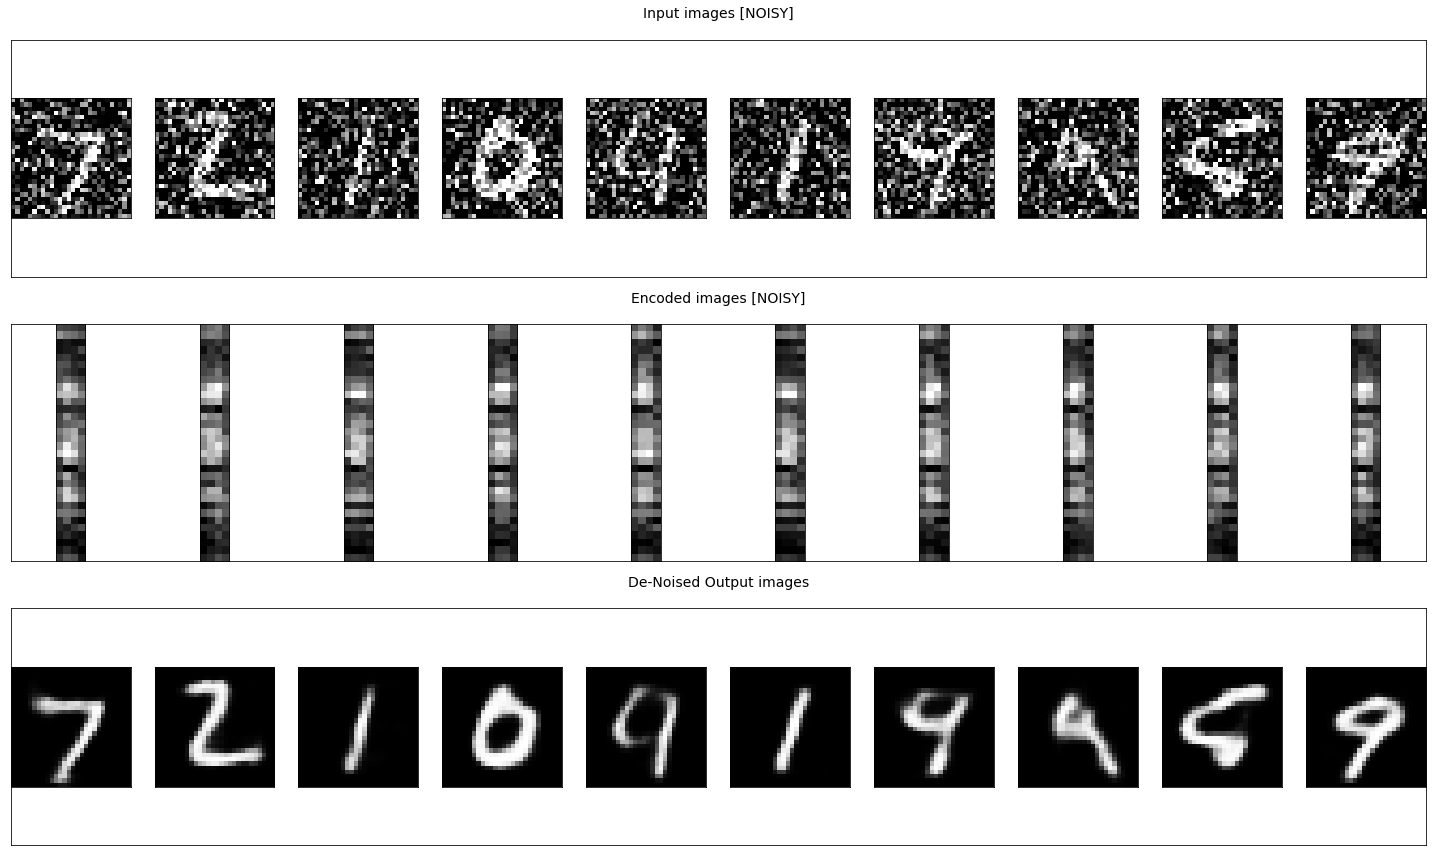

In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#       ██╗   ██╗██╗███████╗██╗   ██╗ █████╗ ██╗            ██████╗ ███████╗    ███╗   ██╗        #
#       ██║   ██║██║██╔════╝██║   ██║██╔══██╗██║            ██╔══██╗██╔════╝    ████╗  ██║        #
#       ██║   ██║██║███████╗██║   ██║███████║██║            ██║  ██║█████╗█████╗██╔██╗ ██║        #
#       ╚██╗ ██╔╝██║╚════██║██║   ██║██╔══██║██║            ██║  ██║██╔══╝╚════╝██║╚██╗██║        #
#        ╚████╔╝ ██║███████║╚██████╔╝██║  ██║███████╗██╗    ██████╔╝███████╗    ██║ ╚████║        #
#         ╚═══╝  ╚═╝╚══════╝ ╚═════╝ ╚═╝  ╚═╝╚══════╝╚═╝    ╚═════╝ ╚══════╝    ╚═╝  ╚═══╝        #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #                                                                          

# This is the section where we will evaluate if our newly trained autoencoder is
# able to recontruct a clean digit picture given a noisy one. Like we already
# did previously, the best way to show if everything is working correctly is to
# try and plot how the noisy pictures are handled by the autencoder, to see if
# it's actually capable of de-noising. Therefore, in this section too, we'll
# plot how the data appears before, through and after being fed into our
# autoencoder.

# ==================================== #
# Visualize nosiy, encoded and cleaned #
# ==================================== #

# In this paragraph, we plot how the noisy images fed into our are AE are
# manipulated. Like we did before, we need to define the variables that will
# contain the data that we'd like to plot. As always, we would like to see:
# - the noisy images before being fed to the AE;
# - the noisy images in their encoded form, represented by the encoded_imgs_noisy;
# - the output of the AE, which is going to be the decoded picture, thus the
#    cleaned picture.
# Like before, we'll use the predict() function of Keras, so that its output,
# that is the encoded and decoded data, can be saved to a variable.
encoded_imgs_noisy = encoder.predict(x_test_noisy)
decoded_imgs_cleaned = autoencoder.predict(x_test_noisy)


# Here we plot what the autoencoders returns when fed from noisy data.
fig, big_axes = plt.subplots(figsize=(20, 12) , nrows=3, ncols=1, sharey=True)
img_type_noisy = ['Input images [NOISY]',
                    'Encoded images [NOISY]',
                    'De-Noised Output images']
for row, big_ax in enumerate(big_axes):
    # display a subplot row 'n' title
    big_ax.set_title("%s\n" % img_type_noisy[row], fontsize=14)
    big_ax.get_xaxis().set_visible(False)
    big_ax.get_yaxis().set_visible(False)
    big_ax._frameon = True
    fig.tight_layout()
for i in range(n):
    # display noisy original
    ax = fig.add_subplot(3, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded
    ax = fig.add_subplot(3, n, i+1 + n)
    plt.imshow(encoded_imgs_noisy[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = fig.add_subplot(3, n, i+1+ n + n)
    plt.imshow(decoded_imgs_cleaned[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show() 

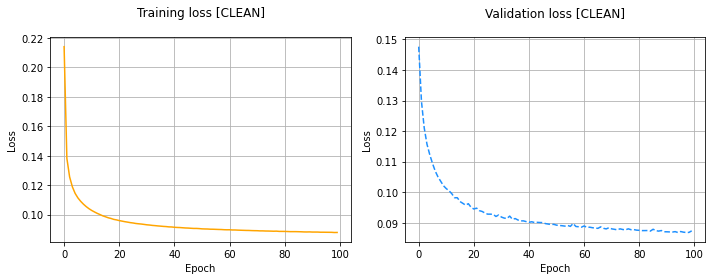

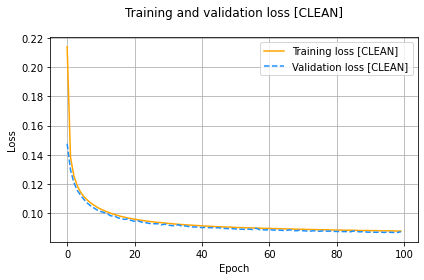

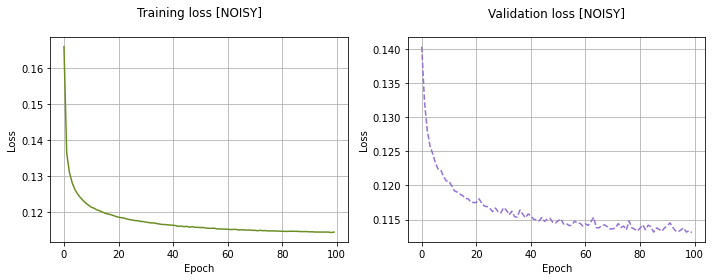

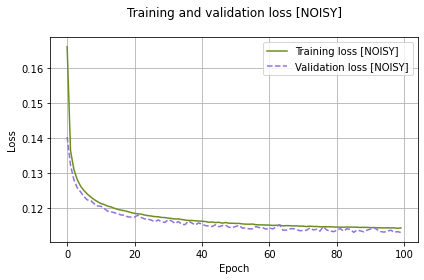

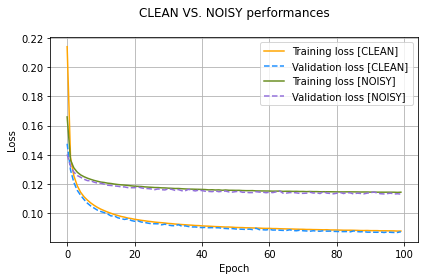

In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#  ██████╗ ███████╗██████╗ ███████╗ ██████╗ ██████╗ ███╗   ███╗ █████╗ ███╗   ██╗ ██████╗███████╗ #
#  ██╔══██╗██╔════╝██╔══██╗██╔════╝██╔═══██╗██╔══██╗████╗ ████║██╔══██╗████╗  ██║██╔════╝██╔════╝ #
#  ██████╔╝█████╗  ██████╔╝█████╗  ██║   ██║██████╔╝██╔████╔██║███████║██╔██╗ ██║██║     █████╗   #
#  ██╔═══╝ ██╔══╝  ██╔══██╗██╔══╝  ██║   ██║██╔══██╗██║╚██╔╝██║██╔══██║██║╚██╗██║██║     ██╔══╝   #
#  ██║     ███████╗██║  ██║██║     ╚██████╔╝██║  ██║██║ ╚═╝ ██║██║  ██║██║ ╚████║╚██████╗███████╗ #
#  ╚═╝     ╚══════╝╚═╝  ╚═╝╚═╝      ╚═════╝ ╚═╝  ╚═╝╚═╝     ╚═╝╚═╝  ╚═╝╚═╝  ╚═══╝ ╚═════╝╚══════╝ #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

# This is the section where we are going to evaulate the overall performance of
# the autoencoder model that we built and trained. Before we start, we may
# anticipate that we already expect a particular behaviour from our model,
# because we expect it to converge after a sufficient amount of epochs.
# In order to have an idea of how long the convergence process is going to take,
# we'll plot how the values for the training loss and validation loss will
# change with respect to the number of epochs. We will evaluate training and 
# validation loss, both in the clean and noisy instances, then we'll compare
# one against the other. Here's a recap of the graphs that we'll plot:
# - Training Loss [CLEAN];
# - Validation Loss [CLEAN];
# - Training VS. Validation Loss [CLEAN];
# - Training Loss [NOISY];
# - Validation Loss [NOISY];
# - Training VS. Validation Loss [NOISY];
# - CLEAN VS. NOISY performance.


# ==================================== #
# Training and Validation Loss [CLEAN] #
# ==================================== #

loss_clean = autoencoder_train.history['loss']
val_loss_clean = autoencoder_train.history['val_loss']
epochs = range(number_of_epochs)

fig_clean = plt.figure(figsize=(10,4))
ax1 = fig_clean.add_subplot(1, 2, 1)
plt.plot(epochs, loss_clean, 'orange', linestyle='-', label='Training loss [CLEAN]')
ax1.set_title('Training loss [CLEAN]\n')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
ax2 = fig_clean.add_subplot(1, 2, 2)
plt.plot(epochs, val_loss_clean, 'dodgerblue', linestyle='--', label='Validation loss [CLEAN]')
ax2.set_title('Validation loss [CLEAN]\n')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
fig_clean.tight_layout()

# ==================================== #
# Training VS. Validation Loss [CLEAN] #
# ==================================== #

plt.figure()
plt.plot(epochs, loss_clean, 'orange', linestyle='-', label='Training loss [CLEAN]')
plt.plot(epochs, val_loss_clean, 'dodgerblue', linestyle='--', label='Validation loss [CLEAN]')
plt.title('Training and validation loss [CLEAN]\n')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



# ==================================== #
# Training and Validation Loss [NOISY] #
# ==================================== #

loss_noisy = autoencoder_noisy.history['loss']
val_loss_noisy = autoencoder_noisy.history['val_loss']
epochs = range(number_of_epochs)

fig_noisy = plt.figure(figsize=(10,4))
ax1 = fig_noisy.add_subplot(1, 2, 1)
plt.plot(epochs, loss_noisy, 'olivedrab', linestyle='-', label='Training loss [NOISY]')
ax1.set_title('Training loss [NOISY]\n')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
ax2 = fig_noisy.add_subplot(1, 2, 2)
plt.plot(epochs, val_loss_noisy, 'mediumpurple', linestyle='--', label='Validation loss [NOISY]')
ax2.set_title('Validation loss [NOISY]\n')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
fig_noisy.tight_layout()

# ==================================== #
# Training VS. Validation Loss [NOISY] #
# ==================================== #

plt.figure()
plt.plot(epochs, loss_noisy, 'olivedrab', linestyle='-', label='Training loss [NOISY]')
plt.plot(epochs, val_loss_noisy, 'mediumpurple', linestyle='--', label='Validation loss [NOISY]')
plt.title('Training and validation loss [NOISY]\n')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



# ==================================== #
#           CLEAN VS. NOISY            #
# ==================================== #

plt.figure()
plt.plot(epochs, loss_clean, 'orange', linestyle='-', label='Training loss [CLEAN]')
plt.plot(epochs, val_loss_clean, 'dodgerblue', linestyle='--', label='Validation loss [CLEAN]')
plt.plot(epochs, loss_noisy, 'olivedrab', linestyle='-', label='Training loss [NOISY]')
plt.plot(epochs, val_loss_noisy, 'mediumpurple', linestyle='--', label='Validation loss [NOISY]')
plt.title('CLEAN VS. NOISY performance\n')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#    ██████╗ ██████╗ ███╗   ██╗ ██████╗██╗     ██╗   ██╗███████╗██╗ ██████╗ ███╗   ██╗███████╗    #
#   ██╔════╝██╔═══██╗████╗  ██║██╔════╝██║     ██║   ██║██╔════╝██║██╔═══██╗████╗  ██║██╔════╝    #
#   ██║     ██║   ██║██╔██╗ ██║██║     ██║     ██║   ██║███████╗██║██║   ██║██╔██╗ ██║███████╗    #
#   ██║     ██║   ██║██║╚██╗██║██║     ██║     ██║   ██║╚════██║██║██║   ██║██║╚██╗██║╚════██║    #
#   ╚██████╗╚██████╔╝██║ ╚████║╚██████╗███████╗╚██████╔╝███████║██║╚██████╔╝██║ ╚████║███████║    #
#    ╚═════╝ ╚═════╝ ╚═╝  ╚═══╝ ╚═════╝╚══════╝ ╚═════╝ ╚══════╝╚═╝ ╚═════╝ ╚═╝  ╚═══╝╚══════╝    #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

# From what we can see in our first comparison, Train VS. Validation Loss
# [CLEAN], we may say that our model converges to a loss around 0.087. 
# Moreover, from the same graph, we can see that the validation loss and the
# training loss both are in sync. It shows that our model is not overfitting:
# the validation loss appears to be decreasing and not increasing, and there is
# rarely any gap between training and validation loss.
# Therefore, we can say that our model's generalization capability is quite good.

# Next, we can look at the second comparison, Train VS. Validation Loss [NOISY].
# From the shown plot, we may infer that our model is overfitting at some epochs,
# given the little spikes that appear on the plotted curve, but, overall, both
# curves stay in sync for most of the time. In order to achieve better results,
# we may try to introduce some more complexity into our model, so that the loss
# can be reduced even further.

# Finally, we can take in exam the last comparison, CLEAN VS. NOISY, which
# manages to depict quite well the generalization capabilities of our model.
# As shown from the graph, the achieved performance appears not so far away
# between the two cases, therefore showing, once again, good generalization
# capabilities when given noisy test data.

# Overall, we may say that the achieved performance is significantly better than
# those that would have be obtained with less complex model implementations of
# the autoencoder. This is in large part due to the higher entropic capacity of
# our encoded representation, that is 4*4*8 = 128 dimensions.
# Our autoencoder has a higher entropic capacity (that is how much information
# the model is allowed to store) than the models which happen to have a smaller
# encoded dimensionalty, which enables it to perform quite well. Given this
# assumption, we may inquire that "the higher the dimensionality, the better",
# but that's not always the case. Actually, we have to remember that we decided
# to employ an autoencoder manifold with the aim of simplifying the learning
# process and make it less prone to overfit. Therefore the dimensionality of the
# encoded representation needs to be fine tuned. We've found that a good balance
# between the entropic capacity and the risk of overfitting is represented by
# the encoded dimensionality implemented.

# As we've seen in this project, it's been possible to develop a machine
# learning algorithm that is capable of reconstructing quality pictures from
# noisy ones, thanks to the use of an autoencoder model.
# The results achieved are pretty good, especially if we consider how easily
# accessible the tools that made it possible are.
# For our task, we decided to adopt Keras libraries and tools, because they have
# proved to be notably immediate and user-friendly, particularly when compared
# to the PyTorch alternatives. The latter ones generally require a finer tuning
# in order to achieve comparable results. On the contrary side, thanks to its
# lower level parametrization, we may say that PyTorch provides us a deeper look
# on how the data are handled by the algorithms.

# As we see from the graphs, we can see good generalization capabilities, given 
# the fact that it barely overfits. We've also seen that the most important
# imporvements over performance can be already achieved around the first 50
# epochs. Letting the model train for longer will surely reduce the losses even
# more, but the improvements will become so little that not always the cost of 
# improvement may be justified, both in terms of time and of resources
# utilization.